## Function which finds the R1,CROT and R2 for arbitrary single qubit rho. 

In [1]:
from qutip import *

In [29]:
from scipy import optimize as opt
import numpy as np

In [30]:
help(opt.minimize_scalar)

Help on function minimize_scalar in module scipy.optimize._minimize:

minimize_scalar(fun, bracket=None, bounds=None, args=(), method='brent', tol=None, options=None)
    Minimization of scalar function of one variable.
    
    Parameters
    ----------
    fun : callable
        Objective function.
        Scalar function, must return a scalar.
    bracket : sequence, optional
        For methods 'brent' and 'golden', `bracket` defines the bracketing
        interval and can either have three items ``(a, b, c)`` so that
        ``a < b < c`` and ``fun(b) < fun(a), fun(c)`` or two items ``a`` and
        ``c`` which are assumed to be a starting interval for a downhill
        bracket search (see `bracket`); it doesn't always mean that the
        obtained solution will satisfy ``a <= x <= c``.
    bounds : sequence, optional
        For method 'bounded', `bounds` is mandatory and must have two items
        corresponding to the optimization bounds.
    args : tuple, optional
        E

In [31]:
help(rotation)

Help on function rotation in module qutip.qip.gates:

rotation(op, phi, N=None, target=0)
    Single-qubit rotation for operator op with angle phi.
    
    Returns
    -------
    result : qobj
        Quantum object for operator describing the rotation.



In [132]:
g1 = lambda alpha, phi: tensor(rotation(N=1,target=0, phi = alpha, op = sigmax()*np.cos(phi) + sigmay()*np.sin(phi)),qeye(2))
g2 = lambda beta, phi: tensor(qeye(2),rotation(N=1, target=0, phi = beta, op = sigmax()*np.cos(phi) + sigmay()*np.sin(phi)))
g3 = lambda gamma: tensor(fock_dm(2,0), rotation(phi = gamma, op = sigmax()))+tensor(fock_dm(2,1), qeye(2))
        
def bm(x):
    init_state = tensor(fock_dm(2,0), fock_dm(2,0))
    a = x[0]
    b = x[1]
    c = x[2]
    d = x[3]
    r1 = g1(a,d)
    r2 = g2(b,d)
    crot = g3(c)

    rf = r2*crot*r1*init_state*r1.dag()*crot.dag()*r2.dag()
    #A = rf.ptrace(0)-rho
    #print(A)
    #tr_diff = 0.5*np.sum(np.abs(np.array(A.eigenenergies())))
    #print(tr_diff)
    return rf



def State_prepare(rho):
    
    init_state = tensor(fock_dm(2,0), fock_dm(2,0))
    
    #3 gates
    
    g1 = lambda alpha, phi: tensor(rotation(N=1,target=0, phi = alpha, op = sigmax()*np.cos(phi) + sigmay()*np.sin(phi)),qeye(2))
    g2 = lambda beta, phi: tensor(qeye(2),rotation(N=1, target=0, phi = beta, op = sigmax()*np.cos(phi) + sigmay()*np.sin(phi)))
    g3 = lambda gamma: tensor(fock_dm(2,0), rotation(phi = gamma, op = sigmax()))+tensor(fock_dm(2,1), qeye(2))
    
    def opt_fun(x):
        a = x[0]
        b = x[1]
        c = x[2]
        phi = x[3]
        r1 = g1(a,phi)
        r2 = g2(b,phi)
        crot = g3(c)
        
        rf = r2*crot*r1*init_state*r1.dag()*crot.dag()*r2.dag()
        A = rf.ptrace(0)-rho
        #print(A)
        tr_diff = 0.5*np.sum(np.abs(np.array(A.eigenenergies())))
        print(tr_diff)
        return tr_diff
    #print(opt_fun([np.pi,np.pi,np.pi]))
    #print(rho)
    res = opt.minimize(opt_fun,x0 = np.array([0.5*np.pi,np.pi,np.pi,np.pi*0.5]))
    return res.x

In [135]:
State_prepare(thermal_dm(2,5))

0.04545454545454522
0.045454552905126094
0.04545454545454522
0.04545454545454537
0.04545454545454536
0.04545454545454522
0.19425823202068054
0.19425823202068054
0.19425822548218097
0.19425823202068054
0.19425823202068052
0.1942582320206806
0.004129214068993862
0.004129214068993862
0.0041292066551391095
0.004129214068993862
0.004129214068995071
0.004129214068994001
0.020570778542286478
0.020570778542286478
0.020570785983634543
0.020570778542286478
0.02057077854228677
0.020570778542286422
0.0005842846342383323
0.0005842846342383323
0.0005842920547574482
0.0005842846342383323
0.0005842846342472014
0.0005842846342381658
0.0017740528487078344
0.0017740528487078344
0.0017740454314393406
0.0017740528487078344
0.0017740528487107023
0.0017740528487080564
3.9237146978783206e-05
3.9237146978783206e-05
3.9244566761459845e-05
3.9237146978783206e-05
3.9237147110411123e-05
3.923714697864443e-05
0.0011576033416831203
0.0011576033416831203
0.001157595923548597
0.0011576033416831203
0.001157603341687425

3.835540977547198e-09
5.0028930075790895e-09
3.835541144378834e-09
3.8355409790704334e-09
3.8355409790704334e-09
3.6421283632875064e-09
3.835540977547198e-09
5.0028930075790895e-09
3.835541144378834e-09
3.8355409790704334e-09
3.8355409790704334e-09
3.6421283632875064e-09
3.835540977547198e-09
5.0028930075790895e-09
3.835541144378834e-09
3.8355409790704334e-09
3.8355409790704334e-09
3.6421283632875064e-09
3.835540977547198e-09
5.0028930075790895e-09
3.835541144378834e-09
3.8355409790704334e-09
3.8355409790704334e-09
3.6421283632875064e-09
3.835540977547198e-09
5.0028930075790895e-09
3.835541144378834e-09
3.8355409790704334e-09
3.8355409790704334e-09
3.6421283632875064e-09
3.835540977547198e-09
5.0028930075790895e-09
3.835541144378834e-09
3.8355409790704334e-09
3.8355409790704334e-09
3.6421283632875064e-09
3.835540977547198e-09
5.0028930075790895e-09
3.835541144378834e-09
3.8355409790704334e-09
3.8355409790704334e-09
3.6421283632875064e-09
3.835540977547198e-09
5.0028930075790895e-09
3.8

array([1.47976154, 3.14159265, 3.14159265, 1.57079633])

/Users/vvv/miniconda3/envs/qutip-env/lib/python3.7/site-packages/qutip/visualization.py:323: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(xlabels)
/Users/vvv/miniconda3/envs/qutip-env/lib/python3.7/site-packages/qutip/visualization.py:331: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_yticklabels(list(reversed(ylabels)))


(<Figure size 576x432 with 2 Axes>, <AxesSubplot:>)

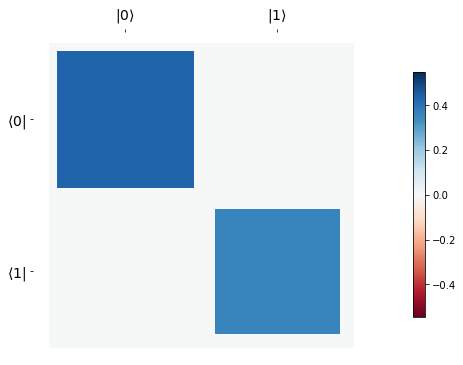

In [136]:
hinton(bm(np.array([1.47976154, 3.14159265, 3.14159265,0])).ptrace(0))

### Benchmark for a pure state


In [137]:
se = qeye(2)*0.5
sy = sigmax()*0.5
state = se+sy

In [138]:
State_prepare(state)

0.5
0.5
0.5
0.5000000037252903
0.5
0.5
0.43766263330738614
0.43766263330738614
0.4376626333073862
0.43766263330738614
0.4376626370036104
0.43766263330738614
0.20745136352976884
0.20745136352976884
0.20745136352976903
0.20745136352976884
0.20745136655084195
0.20745136352976895
0.0640193871193299
0.0640193871193299
0.06401938711932804
0.06401938711933007
0.06401938529552119
0.06401938711932917
0.00034260534075590196
0.00034260534075590196
0.0003426053413759469
0.00034260534075595747
0.000342605478639606
0.00034260534099545166
2.0717632107723598e-05
2.0717632107723598e-05
2.0710685468810853e-05
2.0717632107667073e-05
2.071763194332831e-05
2.0714948601438975e-05
0.0007147694430426147
0.0007147694430426147
0.0007147755787698238
0.0007147694431012108
0.0007147693787340412
0.0007147718100965118
7.406943523138199e-05
7.406943523138199e-05
7.407630955583295e-05
7.406943523181805e-05
7.40694315995841e-05
7.407209067216832e-05
1.806887225790716e-06
1.806887225790716e-06
1.8048743676735885e-06
1.8

2.661403441266393e-09
6.988641019197918e-09
2.6614017602356968e-09
2.66146653623988e-09
5.229558444876506e-09
2.6614034412663936e-09
2.6614034412663936e-09
6.988641019197918e-09
2.6614017602356968e-09
2.66146653623988e-09
5.229558444876506e-09
2.661403441266393e-09
2.661403441266393e-09
6.988641019197918e-09
2.6614017602356968e-09
2.66146653623988e-09
5.229558444876506e-09
2.661403441266393e-09
2.661403441266393e-09
6.988641019197918e-09
2.6614017602356968e-09
2.66146653623988e-09
5.229558444876506e-09
2.6614034412663936e-09
2.6614034412663936e-09
6.988641019197918e-09
2.6614017602356968e-09
2.66146653623988e-09
5.229558444876506e-09
2.661403441266393e-09
2.661403441266393e-09
6.988641019197918e-09
2.6614017602356968e-09
2.66146653623988e-09
5.229558444876506e-09
2.661403441266393e-09
2.661403441266393e-09
6.988641019197918e-09
2.6614017602356968e-09
2.66146653623988e-09
5.229558444876506e-09
2.6614034412663936e-09
2.6614034412663936e-09
6.988641019197918e-09
2.6614017602356968e-09
2.6

array([1.57079632e+00, 3.14159169e+00, 1.12974158e-04, 1.57079632e+00])

/Users/vvv/miniconda3/envs/qutip-env/lib/python3.7/site-packages/qutip/visualization.py:323: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(xlabels)
/Users/vvv/miniconda3/envs/qutip-env/lib/python3.7/site-packages/qutip/visualization.py:331: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_yticklabels(list(reversed(ylabels)))


(<Figure size 576x432 with 2 Axes>, <AxesSubplot:>)

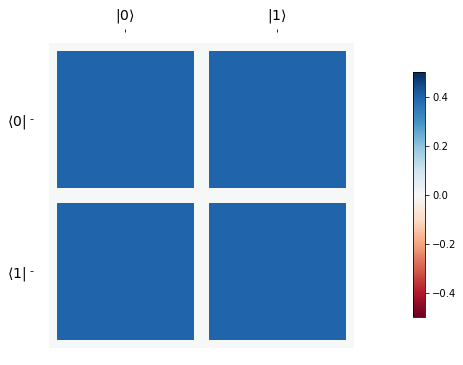

In [140]:
hinton(bm(np.array([1.57079632e+00, 3.14159169e+00, 1.12974158e-04, 1.57079632e+00])).ptrace(0))

### Check for the arbitrary state 

In [141]:
rho = rand_dm(2); rho

Quantum object: dims = [[2], [2]], shape = (2, 2), type = oper, isherm = True
Qobj data =
[[ 0.79637922+0.j         -0.32361348-0.12638139j]
 [-0.32361348+0.12638139j  0.20362078+0.j        ]]

In [143]:
a,b,c,d = State_prepare(rho)

0.4566602419153206
0.45666024675085726
0.4566602419153206
0.4566602392753839
0.45666024191532073
0.4566602419153206
0.33775527041273223
0.33775527041273223
0.33775527310095754
0.3377552704127322
0.33775526747952733
0.3377552706464904
0.2727782334653689
0.2727782334653689
0.27277822974097854
0.27277823346536895
0.2727782319135299
0.2727782341376491
0.22220880006498306
0.22220880006498306
0.22220879725061177
0.22220880006498306
0.22220879791935855
0.22220880105503368
0.17814205792271687
0.17814205792271687
0.17814206116637937
0.1781420579227168
0.17814205581690779
0.1781420592123657
0.12150773941059363
0.12150773941059363
0.12150774094210233
0.12150773941059359
0.12150773728490652
0.12150774086365448
0.039492859137757894
0.039492859137757894
0.03949285757779282
0.03949285913775784
0.03949285765761915
0.039492856253567216
0.01779980262271011
0.01779980262271011
0.017799806664042753
0.01779980262271002
0.01779980388783812
0.017799802752550914
0.034355734363573406
0.034355734363573406
0.034

2.624878957265874e-09
3.5026276340516005e-09
2.23137418661959e-09
2.23137418661959e-09
6.345435758489321e-09
2.2313742173892618e-09
2.624878957265874e-09
3.5026276340516005e-09
2.23137418661959e-09
2.23137418661959e-09
6.345435758489321e-09
2.2313742173892618e-09
2.624878957265874e-09
3.5026276340516005e-09
2.23137418661959e-09
2.23137418661959e-09
6.345435758489321e-09
2.2313742173892618e-09
2.624878957265874e-09
3.5026276340516005e-09
2.23137418661959e-09
2.23137418661959e-09
6.345435758489321e-09
2.2313742173892618e-09
2.624878957265874e-09
3.5026276340516005e-09
2.23137418661959e-09
2.23137418661959e-09
6.345435758489321e-09
2.2313742173892618e-09
2.624878957265874e-09
3.5026276340516005e-09
2.23137418661959e-09
2.23137418661959e-09
6.345435758489321e-09
2.2313742173892618e-09
2.624878957265874e-09
3.5026276340516005e-09
2.23137418661959e-09
2.23137418661959e-09
6.345435758489321e-09
2.2313742173892618e-09
2.624878957265874e-09
3.5026276340516005e-09
2.23137418661959e-09
2.23137418

In [144]:
a,b,c,d

(0.9363167755568941, 3.141592665001725, 5.222911966105127, 1.1984786521800053)

/Users/vvv/miniconda3/envs/qutip-env/lib/python3.7/site-packages/qutip/visualization.py:323: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(xlabels)
/Users/vvv/miniconda3/envs/qutip-env/lib/python3.7/site-packages/qutip/visualization.py:331: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_yticklabels(list(reversed(ylabels)))


(<Figure size 576x432 with 2 Axes>, <AxesSubplot:>)

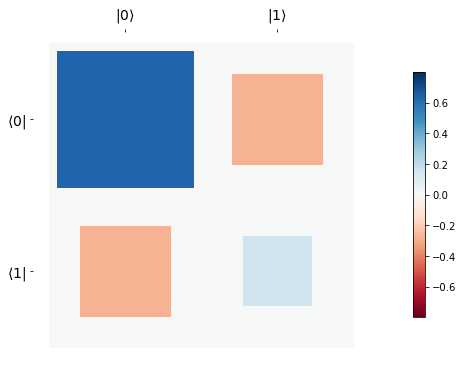

In [145]:
hinton(rho)

/Users/vvv/miniconda3/envs/qutip-env/lib/python3.7/site-packages/qutip/visualization.py:323: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(xlabels)
/Users/vvv/miniconda3/envs/qutip-env/lib/python3.7/site-packages/qutip/visualization.py:331: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_yticklabels(list(reversed(ylabels)))


(<Figure size 576x432 with 2 Axes>, <AxesSubplot:>)

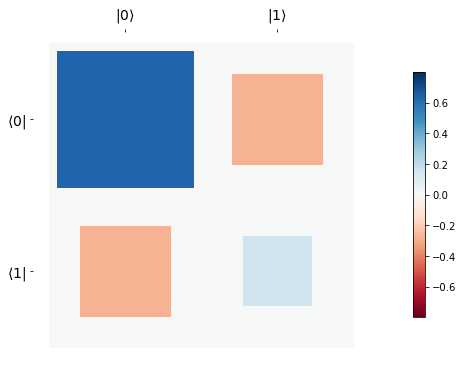

In [147]:
hinton(bm([a,b,c,d]).ptrace(0))